In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("credit_risk_dataset.csv")

In [6]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
df.shape

(32581, 12)

In [9]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [18]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [17]:
df.dropna(axis=0, inplace = True)

In [19]:
df.drop_duplicates(inplace=True)

In [23]:
corr_df=df[['loan_percent_income','loan_status']]

In [29]:
correlation=corr_df['loan_percent_income'].corr(corr_df['loan_status'])
print(f"correlation between D/I ratio:",correlation)


correlation between D/I ratio: 0.3800002529181795


Text(0, 0.5, 'D/I ratio')

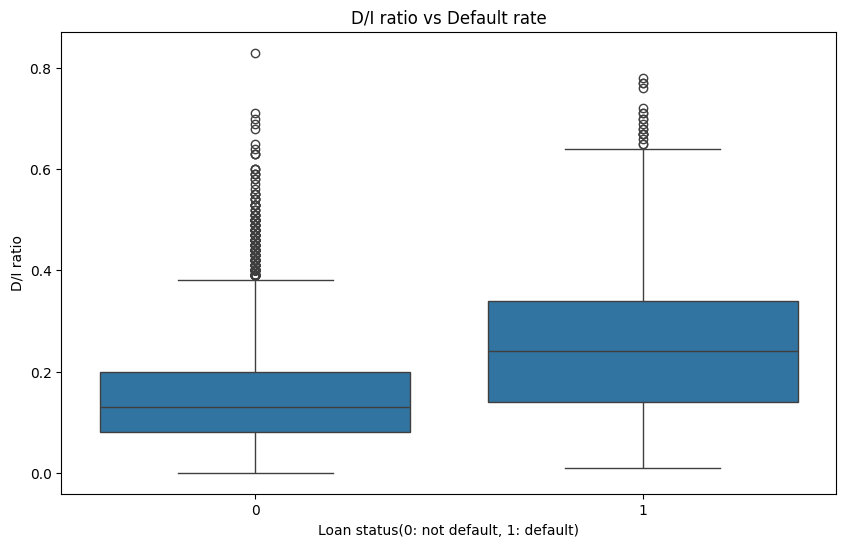

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status', y='loan_percent_income',data=df)
plt.title("D/I ratio vs Default rate")
plt.xlabel("Loan status(0: not default, 1: default)")
plt.ylabel("D/I ratio")

Ranking of Loan Intents by Default Count:
         Loan Intent  Default Count  Average Loan Amount
3            MEDICAL           1418         11373.748237
0  DEBTCONSOLIDATION           1294         11316.750386
1          EDUCATION            967         11160.082730
4           PERSONAL            961         10708.896982
2    HOMEIMPROVEMENT            820          9966.067073
5            VENTURE            728         11304.910714

Ranking of Loan Intents by Average Loan Amount:
         Loan Intent  Default Count  Average Loan Amount
3            MEDICAL           1418         11373.748237
0  DEBTCONSOLIDATION           1294         11316.750386
5            VENTURE            728         11304.910714
1          EDUCATION            967         11160.082730
4           PERSONAL            961         10708.896982
2    HOMEIMPROVEMENT            820          9966.067073


/var/folders/q9/rh30z5k956lb6z5cfhld4m_m0000gn/T/ipykernel_20128/2978488888.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Default Count", y="Loan Intent", data=loan_intent_default_summary, palette="viridis", ax=ax1)


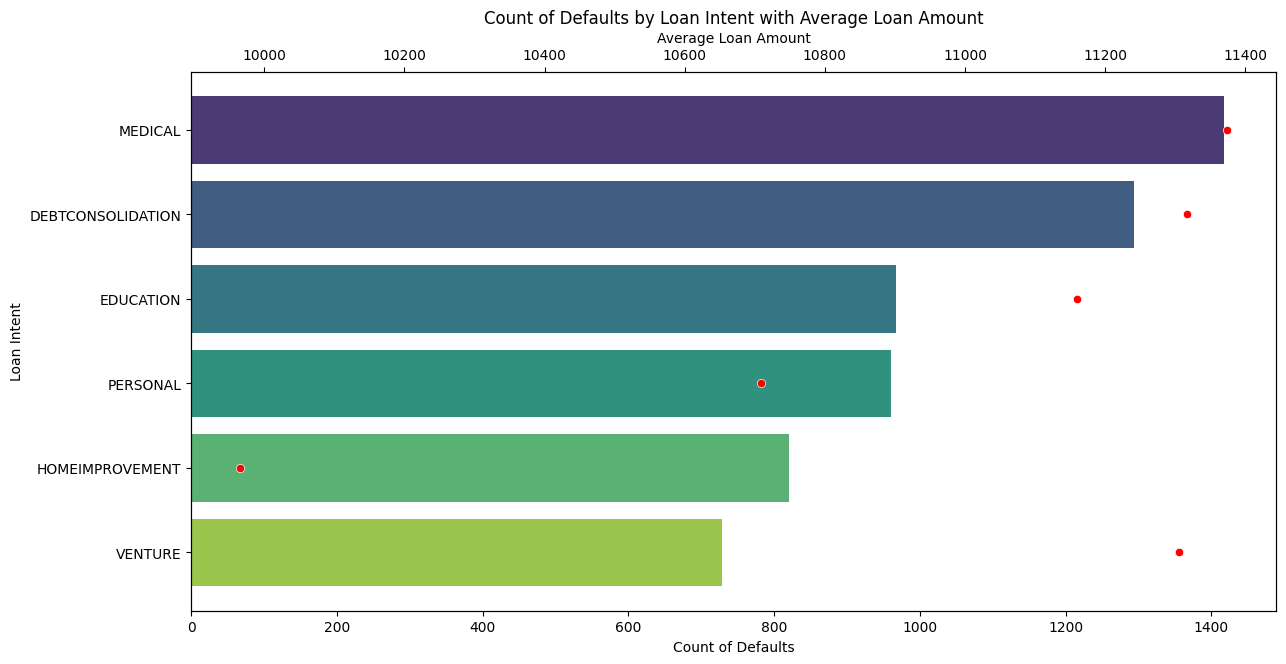

In [34]:
default_cases = df[df["loan_status"]==1]
loan_intent_default_count = default_cases.groupby("loan_intent")["loan_status"].count().reset_index()
loan_intent_default_count.columns = ["Loan Intent", "Default Count"]
loan_intent_avg_loan_amount = default_cases.groupby("loan_intent")["loan_amnt"].mean().reset_index()
loan_intent_avg_loan_amount.columns = ["Loan Intent", "Average Loan Amount"]
loan_intent_default_summary = pd.merge(loan_intent_default_count, loan_intent_avg_loan_amount, on="Loan Intent")
loan_intent_default_summary = loan_intent_default_summary.sort_values(by='Default Count', ascending=False)
defaultcount = loan_intent_default_summary.sort_values(by="Default Count", ascending=False)
print("Ranking of Loan Intents by Default Count:")
print(defaultcount)
avgloanamount = loan_intent_default_summary.sort_values(by="Average Loan Amount", ascending=False)
print("\nRanking of Loan Intents by Average Loan Amount:")
print(avgloanamount)
fig, ax1 = plt.subplots(figsize=(14,7))
sns.barplot(x="Default Count", y="Loan Intent", data=loan_intent_default_summary, palette="viridis", ax=ax1)
ax1.set_title("Count of Defaults by Loan Intent with Average Loan Amount")
ax1.set_xlabel("Count of Defaults")
ax1.set_ylabel("Loan Intent")
ax2 = ax1.twiny()
sns.scatterplot(x="Average Loan Amount", y="Loan Intent", data=loan_intent_default_summary, color="red", ax=ax2)
ax2.set_xlabel("Average Loan Amount")
plt.show()

LOGISTIC REGRESSION

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score

In [38]:
X = df[["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "person_home_ownership", "loan_intent","cb_person_default_on_file"]]
y = df["loan_status"]
X.drop(columns=["loan_amnt"], inplace=True)
numeric_features = ["person_age","person_income","person_emp_length","loan_int_rate"]
categorical_features = ["person_home_ownership","loan_intent","cb_person_default_on_file"]
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers= [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
X_processed = preprocessor.fit_transform(X)
categorical_columns = preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)
all_columns = numeric_features + list(categorical_columns)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train,y_train)
y_pred = logistic_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("\nClassification Report:")
print(classification_report(y_test,y_pred))
categories = {
    "person_home_ownership": ['RENT', 'OWN', 'MORTGAGE', 'OTHER'],
    "loan_intent": ['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'],
    "cb_person_default_on_file": ['Y', 'N']
}

def predict_loan_default():
  print("\nEnter applicant details for credit risk assessment:")
  age = float(input("Applicant's age:"))
  income = float(input("Applicant's income:"))
  emp_length = float(input("Applicant's employment length (in years):"))
  loan_int_rate = float(input("Loan interest rate:"))
  loan_amnt = float(input("Loan amount requested:"))
  loan_percent_income = loan_amnt/income
  home_ownership = input("Home ownership (RENT/MORTGAGE/OWN/OTHER):").upper()
  loan_intent = input("Loan intent (DEBTCONSOLIDATION/EDUCATION/HOMEIMPROVEMENT/MEDICAL/PERSONAL/VENTURE):").upper()
  default_history = input("Has the applicant defaulted before (Y/N):").upper()

  input_data = {
      "person_age": [age],
      "person_income": [income],
      "person_emp_length": [emp_length],
      "loan_int_rate": [loan_int_rate]
  }
  for category, value in zip(["person_home_ownership","loan_intent","cb_person_default_on_file"],[home_ownership,loan_intent,default_history]):
    for val in categories[category]:
      input_data[f"{category}_{val}"] = [1 if value == val else 0]
  input_data = pd.DataFrame(input_data)

  for col in all_columns:
    if col not in input_data.columns:
      input_data[col] = 0
  input_data = input_data[all_columns]
  prediction = logistic_classifier.predict(input_data)[0]
  if prediction == 1:
    print("\nBased on the information provided, the applicant is predicted to be more likely to default on the loan")
  else:
    print("\nBased on the information provided, the applicant is predicted to be less likely to default on the loan")

predict_loan_default()

/var/folders/q9/rh30z5k956lb6z5cfhld4m_m0000gn/T/ipykernel_20128/3432974662.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=["loan_amnt"], inplace=True)


Accuracy: 0.8193299421154183

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4441
           1       0.68      0.34      0.46      1260

    accuracy                           0.82      5701
   macro avg       0.76      0.65      0.67      5701
weighted avg       0.80      0.82      0.80      5701


Enter applicant details for credit risk assessment:

Based on the information provided, the applicant is predicted to be less likely to default on the loan


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv("credit_risk_dataset.csv")

X = df[["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate",
        "person_home_ownership", "loan_intent", "cb_person_default_on_file"]]
y = df["loan_status"]

X.drop(columns=["loan_amnt"], inplace=True)

numeric_features = ["person_age", "person_income", "person_emp_length", "loan_int_rate"]
categorical_features = ["person_home_ownership", "loan_intent", "cb_person_default_on_file"]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

X_processed = preprocessor.fit_transform(X)
categorical_columns = preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)
all_columns = numeric_features + list(categorical_columns)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

logistic_classifier = LogisticRegression(random_state=42, max_iter=1000)
logistic_classifier.fit(X_train, y_train)

y_pred = logistic_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

categories = {
    "person_home_ownership": ['RENT', 'OWN', 'MORTGAGE', 'OTHER'],
    "loan_intent": ['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION'],
    "cb_person_default_on_file": ['Y', 'N']
}

def predict_loan_default():
    print("\nEnter applicant details for credit risk assessment:")
    age = float(input("Applicant's age:"))
    income = float(input("Applicant's income:"))
    emp_length = float(input("Applicant's employment length (in years):"))
    loan_int_rate = float(input("Loan interest rate:"))
    home_ownership = input("Home ownership (RENT/MORTGAGE/OWN/OTHER):").upper()
    loan_intent = input("Loan intent (DEBTCONSOLIDATION/EDUCATION/HOMEIMPROVEMENT/MEDICAL/PERSONAL/VENTURE):").upper()
    default_history = input("Has the applicant defaulted before (Y/N):").upper()

    input_data = {
        "person_age": [age],
        "person_income": [income],
        "person_emp_length": [emp_length],
        "loan_int_rate": [loan_int_rate]
    }

    for category, value in zip(["person_home_ownership", "loan_intent", "cb_person_default_on_file"],
                               [home_ownership, loan_intent, default_history]):
        for val in categories[category]:
            input_data[f"{category}_{val}"] = [1 if value == val else 0]

    input_data = pd.DataFrame(input_data)

    for col in all_columns:
        if col not in input_data.columns:
            input_data[col] = 0
    input_data = input_data[all_columns]

    prediction = logistic_classifier.predict(input_data)[0]
    if prediction == 1:
        print("\nBased on the information provided, the applicant is predicted to be more likely to default on the loan")
    else:
        print("\nBased on the information provided, the applicant is predicted to be less likely to default on the loan")

predict_loan_default()


/var/folders/q9/rh30z5k956lb6z5cfhld4m_m0000gn/T/ipykernel_20128/2626525456.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=["loan_amnt"], inplace=True)


Accuracy: 0.8244591069510511

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      5095
           1       0.71      0.33      0.45      1422

    accuracy                           0.82      6517
   macro avg       0.77      0.65      0.67      6517
weighted avg       0.81      0.82      0.80      6517


Enter applicant details for credit risk assessment:


ValueError: could not convert string to float: ''

RANDOM FOREST

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score


In [40]:
X = df[["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "person_home_ownership", "loan_intent","cb_person_default_on_file"]]
y = df["loan_status"]
X.drop(columns=["loan_amnt"], inplace=True)
numeric_features = ["person_age","person_income","person_emp_length","loan_int_rate"]
categorical_features = ["person_home_ownership","loan_intent","cb_person_default_on_file"]
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers= [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
X_processed = preprocessor.fit_transform(X)
categorical_columns = preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)
all_columns = numeric_features + list(categorical_columns)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train,y_train)
y_pred = random_forest_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("\nClassification Report:")
print(classification_report(y_test,y_pred))
categories = {
    "person_home_ownership": ['RENT', 'OWN', 'MORTGAGE', 'OTHER'],
    "loan_intent": ['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'],
    "cb_person_default_on_file": ['Y', 'N']
}

def predict_loan_default():
  print("\nEnter applicant details for credit risk assessment:")
  age = float(input("Applicant's age:"))
  income = float(input("Applicant's income:"))
  emp_length = float(input("Applicant's employment length (in years):"))
  loan_int_rate = float(input("Loan interest rate:"))
  loan_amnt = float(input("Loan amount requested:"))
  loan_percent_income = loan_amnt/income
  home_ownership = input("Home ownership (RENT/MORTGAGE/OWN/OTHER):").upper()
  loan_intent = input("Loan intent (DEBTCONSOLIDATION/EDUCATION/HOMEIMPROVEMENT/MEDICAL/PERSONAL/VENTURE):").upper()
  default_history = input("Has the applicant defaulted before (Y/N):").upper()

  input_data = {
      "person_age": [age],
      "person_income": [income],
      "person_emp_length": [emp_length],
      "loan_int_rate": [loan_int_rate]
  }
  for category, value in zip(["person_home_ownership","loan_intent","cb_person_default_on_file"],[home_ownership,loan_intent,default_history]):
    for val in categories[category]:
      input_data[f"{category}_{val}"] = [1 if value == val else 0]
  input_data = pd.DataFrame(input_data)

  for col in all_columns:
    if col not in input_data.columns:
      input_data[col] = 0
  input_data = input_data[all_columns]
  prediction = random_forest_classifier.predict(input_data)[0]
  if prediction == 1:
    print("\nBased on the information provided, the applicant is predicted to be more likely to default on the loan")
  else:
    print("\nBased on the information provided, the applicant is predicted to be less likely to default on the loan")

predict_loan_default()

/var/folders/q9/rh30z5k956lb6z5cfhld4m_m0000gn/T/ipykernel_20128/3654963867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=["loan_amnt"], inplace=True)


Accuracy: 0.8586212945097351

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4441
           1       0.77      0.51      0.62      1260

    accuracy                           0.86      5701
   macro avg       0.82      0.73      0.76      5701
weighted avg       0.85      0.86      0.85      5701


Enter applicant details for credit risk assessment:

Based on the information provided, the applicant is predicted to be less likely to default on the loan


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


XGBOOST

In [68]:
pip install imbalanced-learn



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import pandas as pd

X = df[["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate",
        "person_home_ownership", "loan_intent","cb_person_default_on_file"]]
y = df["loan_status"]
X.drop(columns=["loan_amnt"], inplace=True)

numeric_features = ["person_age","person_income","person_emp_length","loan_int_rate"]
categorical_features = ["person_home_ownership","loan_intent","cb_person_default_on_file"]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X_processed = preprocessor.fit_transform(X)
categorical_columns = preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)
all_columns = numeric_features + list(categorical_columns)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

xgb_classifier = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    scale_pos_weight=1,  
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

categories = {
    "person_home_ownership": ['RENT', 'OWN', 'MORTGAGE', 'OTHER'],
    "loan_intent": ['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION'],
    "cb_person_default_on_file": ['Y', 'N']
}

def predict_loan_default():
    print("\nEnter applicant details for credit risk assessment:")
    age = float(input("Applicant's age:"))
    income = float(input("Applicant's income:"))
    emp_length = float(input("Applicant's employment length (in years):"))
    loan_int_rate = float(input("Loan interest rate:"))
    loan_amnt = float(input("Loan amount requested:"))
    loan_percent_income = loan_amnt/income
    home_ownership = input("Home ownership (RENT/MORTGAGE/OWN/OTHER):").upper()
    loan_intent = input("Loan intent (DEBTCONSOLIDATION/EDUCATION/HOMEIMPROVEMENT/MEDICAL/PERSONAL/VENTURE):").upper()
    default_history = input("Has the applicant defaulted before (Y/N):").upper()

    input_data = {
        "person_age": [age],
        "person_income": [income],
        "person_emp_length": [emp_length],
        "loan_int_rate": [loan_int_rate]
    }
    for category, value in zip(["person_home_ownership","loan_intent","cb_person_default_on_file"],
                               [home_ownership, loan_intent, default_history]):
        for val in categories[category]:
            input_data[f"{category}_{val}"] = [1 if value == val else 0]
    input_data = pd.DataFrame(input_data)

    for col in all_columns:
        if col not in input_data.columns:
            input_data[col] = 0
    input_data = input_data[all_columns]

    # Predict probability
    prob = xgb_classifier.predict_proba(input_data)[0][1]
    threshold = 0.4 
    if prob >= threshold:
        print("\nBased on the information provided, the applicant is predicted to be more likely to default on the loan")
    else:
        print("\nBased on the information provided, the applicant is predicted to be less likely to default on the loan")
    

predict_loan_default()


/var/folders/q9/rh30z5k956lb6z5cfhld4m_m0000gn/T/ipykernel_20128/3457088842.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=["loan_amnt"], inplace=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:24:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8387294767531073

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      5072
           1       0.64      0.63      0.63      1445

    accuracy                           0.84      6517
   macro avg       0.77      0.76      0.77      6517
weighted avg       0.84      0.84      0.84      6517


Enter applicant details for credit risk assessment:

Based on the information provided, the applicant is predicted to be more likely to default on the loan


FRONTEND

In [58]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 MB 17.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.3/563.3 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.7/815.7 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 14.6 MB/s eta 0:00:0000:010:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Attempting uninstall: huggingface-hub╺━━━━━━━━━━━━━ 13/20 [starlette]
    Found existing installation: huggingface-hub 0.29.3━━━━━━━ 13/20 [starlette]
    Uninstalling huggingface-hub-0.29.3:━━━━━━━━━━━━━ 13/20 [starlette]
      Successfully uninstalled huggingface-hub-0.29.3━━━━━━━━━ 13/20 [starlette]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━ 14

In [59]:
import gradio as gr

In [ ]:
import gradio as gr
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter
import numpy as np

categories = {
    "person_home_ownership": ['RENT', 'OWN', 'MORTGAGE', 'OTHER'],
    "loan_intent": ['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION'],
    "cb_person_default_on_file": ['Y', 'N']
}

numeric_features = ["person_age","person_income","person_emp_length","loan_int_rate"]
categorical_features = ["person_home_ownership","loan_intent","cb_person_default_on_file"]
all_columns = numeric_features + [f"{cat}_{val}" for cat in categories for val in categories[cat]]

def ensemble_predict(person_age, person_income, person_emp_length, loan_int_rate, loan_amnt,
                     person_home_ownership, loan_intent, cb_person_default_on_file):
    
    input_data = {
        "person_age": [float(person_age)],
        "person_income": [float(person_income)],
        "person_emp_length": [float(person_emp_length)],
        "loan_int_rate": [float(loan_int_rate)]
    }
    
    for category, value in zip(["person_home_ownership","loan_intent","cb_person_default_on_file"],
                               [person_home_ownership.upper(), loan_intent.upper(), cb_person_default_on_file.upper()]):
        for val in categories[category]:
            input_data[f"{category}_{val}"] = [1 if value == val else 0]

    input_df = pd.DataFrame(input_data)
    
    for col in all_columns:
        if col not in input_df.columns:
            input_df[col] = 0
    input_df = input_df[all_columns]
    
    preds = []
    for model in [logistic_classifier, random_forest_classifier, xgb_classifier]:
        pred = model.predict(input_df)[0]
        preds.append(pred)
    
    final_pred = Counter(preds).most_common(1)[0][0]
    
    probs = []
    for model in [logistic_classifier, random_forest_classifier, xgb_classifier]:
        if hasattr(model, "predict_proba"):
            probs.append(model.predict_proba(input_df)[0][1])
        else:
            try:
                probs.append(model.predict(xgb.DMatrix(input_df))[0])
            except:
                probs.append(0.5)
    avg_prob = np.mean(probs)
    
    if final_pred == 1:
        return f"Applicant is predicted to be MORE likely to default on the loan\nProbability of default: {avg_prob:.2f}"
    else:
        return f"Applicant is predicted to be LESS likely to default on the loan\nProbability of default: {avg_prob:.2f}"


iface = gr.Interface(
    fn=ensemble_predict,
    inputs=[
        gr.Number(label="Applicant Age"),
        gr.Number(label="Income"),
        gr.Number(label="Employment Length (years)"),
        gr.Number(label="Loan Interest Rate"),
        gr.Number(label="Loan Amount"),
        gr.Dropdown(choices=categories["person_home_ownership"], label="Home Ownership"),
        gr.Dropdown(choices=categories["loan_intent"], label="Loan Intent"),
        gr.Dropdown(choices=categories["cb_person_default_on_file"], label="Default History")
    ],
    outputs="text",
    title="Credit Risk Prediction (Ensemble)",
    description="Ensemble of Logistic Regression, Random Forest, and XGBoost"
)

iface.launch()


* Running on local URL:  http://127.0.0.1:7863
* To create a public link, set `share=True` in `launch()`.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


BETTER GRADIO WITH SMOTE HANDLING

In [76]:
import gradio as gr
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# Categories
categories = {
    "person_home_ownership": ['RENT', 'OWN', 'MORTGAGE', 'OTHER'],
    "loan_intent": ['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION'],
    "cb_person_default_on_file": ['Y', 'N']
}

# Numeric and categorical features
numeric_features = ["person_age","person_income","person_emp_length","loan_int_rate"]
categorical_features = ["person_home_ownership","loan_intent","cb_person_default_on_file"]
all_columns = numeric_features + [f"{cat}_{val}" for cat in categories for val in categories[cat]]

# Assume df is your DataFrame with all features
X = df[["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", 
        "person_home_ownership", "loan_intent","cb_person_default_on_file"]]
y = df["loan_status"]
X.drop(columns=["loan_amnt"], inplace=True)

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
X_processed = preprocessor.fit_transform(X)
categorical_columns = preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)
all_columns = numeric_features + list(categorical_columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle imbalance
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Train models
logistic_classifier = LogisticRegression(random_state=42, max_iter=500)
logistic_classifier.fit(X_train_res, y_train_res)

random_forest_classifier = RandomForestClassifier(random_state=42, n_estimators=200)
random_forest_classifier.fit(X_train_res, y_train_res)

xgb_classifier = xgb.XGBClassifier(random_state=42, n_estimators=200, use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train_res, y_train_res)

# Ensemble prediction function
def ensemble_predict(person_age, person_income, person_emp_length, loan_int_rate, loan_amnt,
                     person_home_ownership, loan_intent, cb_person_default_on_file):
    
    input_data = {
        "person_age": [float(person_age)],
        "person_income": [float(person_income)],
        "person_emp_length": [float(person_emp_length)],
        "loan_int_rate": [float(loan_int_rate)]
    }
    
    for category, value in zip(["person_home_ownership","loan_intent","cb_person_default_on_file"],
                               [person_home_ownership.upper(), loan_intent.upper(), cb_person_default_on_file.upper()]):
        for val in categories[category]:
            input_data[f"{category}_{val}"] = [1 if value == val else 0]

    input_df = pd.DataFrame(input_data)
    for col in all_columns:
        if col not in input_df.columns:
            input_df[col] = 0
    input_df = input_df[all_columns]
    
    preds = []
    for model in [logistic_classifier, random_forest_classifier, xgb_classifier]:
        pred = model.predict(input_df)[0]
        preds.append(pred)
    
    final_pred = Counter(preds).most_common(1)[0][0]
    
    probs = []
    for model in [logistic_classifier, random_forest_classifier, xgb_classifier]:
        if hasattr(model, "predict_proba"):
            probs.append(model.predict_proba(input_df)[0][1])
        else:
            probs.append(0.5)
    avg_prob = np.mean(probs)
    
    if final_pred == 1:
        return f"Applicant is predicted to be MORE likely to default on the loan"
    else:
        return f"Applicant is predicted to be LESS likely to default on the loan"

# Gradio interface
iface = gr.Interface(
    fn=ensemble_predict,
    inputs=[
        gr.Number(label="Applicant Age"),
        gr.Number(label="Income"),
        gr.Number(label="Employment Length (years)"),
        gr.Number(label="Loan Interest Rate"),
        gr.Number(label="Loan Amount"),
        gr.Dropdown(choices=categories["person_home_ownership"], label="Home Ownership"),
        gr.Dropdown(choices=categories["loan_intent"], label="Loan Intent"),
        gr.Dropdown(choices=categories["cb_person_default_on_file"], label="Default History")
    ],
    outputs="text",
    title="Credit Risk Prediction (Ensemble + SMOTE)",
    description="Ensemble of Logistic Regression, Random Forest, and XGBoost with balanced training"
)

iface.launch()


/var/folders/q9/rh30z5k956lb6z5cfhld4m_m0000gn/T/ipykernel_20128/2473324434.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=["loan_amnt"], inplace=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:30:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


* Running on local URL:  http://127.0.0.1:7865
* To create a public link, set `share=True` in `launch()`.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
